# CLONALG Description

In artificial immune systems, clonal selection algorithms are a class of algorithms inspired by the clonal selection theory of acquired immunity that explains how B and T lymphocytes improve their response to antigens over time called affinity maturation. These algorithms focus on the Darwinian attributes of the theory where selection is inspired by the affinity of antigen-antibody interactions, reproduction is inspired by cell division, and variation is inspired by somatic hypermutation. Clonal selection algorithms are most commonly applied to optimization and pattern recognition domains, some of which resemble parallel hill climbing and the genetic algorithm without the recombination operator $[2]$.

<img src="figures/clonalg_pseudocoge.png" alt="Drawing" style="width: 700px;"/>

[[1] Clonal Selection Algorithm](http://www.cleveralgorithms.com/nature-inspired/immune/clonal_selection_algorithm.html).

[[2] Clonal Selection Algorithm - Wikipedia](https://en.wikipedia.org/wiki/Clonal_selection_algorithm).

# Implementation

The demonstration problem is an istance of a continuous function optimization that seeks $min\ f(x)$ where $f\ =\ \sum_{i=1}^{n} x_i^2$, $-5.0 \le x_i \le 5.0$ and $n = 3$. The optimal solution for this basin function is $(v_0, ..., v_{n-1}) = 0.0$ $[1]$.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from clonalg_code import clonalg
from pprint import pprint

In [2]:
# Inputs parameters
b_lo, b_up = (-5, 5)

population_size = 100
selection_size = 10
problem_size = 3
random_cells_num = 20
clone_rate = 20
mutation_rate = 0.2
stop_codition = 1000

In [3]:
stop = 0

# Population <- CreateRandomCells(Population_size, Problem_size)
population = clonalg.create_random_cells(population_size, problem_size, b_lo, b_up)
best_affinity_it = []

while stop != stop_codition:
    # Affinity(p_i)
    population_affinity = [(p_i, clonalg.affinity(p_i)) for p_i in population]
    populatin_affinity = sorted(population_affinity, key=lambda x: x[1])
    
    best_affinity_it.append(populatin_affinity[:5])
    
    # Populatin_select <- Select(Population, Selection_size)
    population_select = populatin_affinity[:selection_size]
    
    # Population_clones <- clone(p_i, Clone_rate)
    population_clones = []
    for p_i in population_select:
        p_i_clones = clonalg.clone(p_i, clone_rate)
        population_clones += p_i_clones
        
    # Hypermutate and affinity
    pop_clones_tmp = []
    for p_i in population_clones:
        ind_tmp = clonalg.hypermutate(p_i, mutation_rate, b_lo, b_up)
        pop_clones_tmp.append(ind_tmp)
    population_clones = pop_clones_tmp
    del pop_clones_tmp
    
    # Population <- Select(Population, Population_clones, Population_size)
    population = clonalg.select(populatin_affinity, population_clones, population_size)
    # Population_rand <- CreateRandomCells(RandomCells_num)
    population_rand = clonalg.create_random_cells(random_cells_num, problem_size, b_lo, b_up)
    population_rand_affinity = [(p_i, clonalg.affinity(p_i)) for p_i in population_rand]
    population_rand_affinity = sorted(population_rand_affinity, key=lambda x: x[1])
    # Replace(Population, Population_rand)
    population = clonalg.replace(population_affinity, population_rand_affinity, population_size)
    population = [p_i[0] for p_i in population]
    
    stop += 1

In [4]:
# We get the mean of the best 5 individuals returned by iteration of the above loop
bests_mean = []
iterations = [i for i in range(1000)]

for pop_it in best_affinity_it:
    bests_mean.append(np.mean([p_i[1] for p_i in pop_it]))

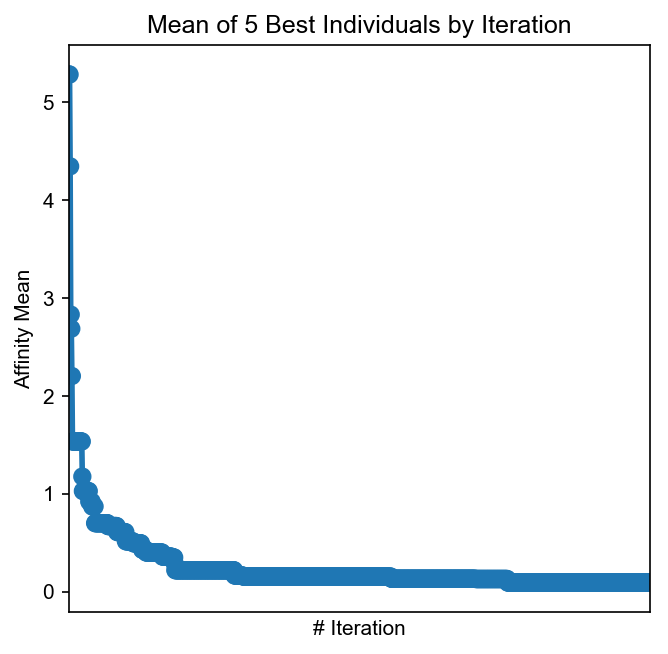

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5), dpi=150)

sns.set_style("darkgrid")
sns.pointplot(x=iterations, y=bests_mean)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title("Mean of 5 Best Individuals by Iteration", fontsize=12)
plt.ylabel("Affinity Mean", fontsize=10)
plt.rc('ytick',labelsize=2)
plt.xlabel("# Iteration", fontsize=10)
plt.show()